In [1]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

In [2]:
# Two lists of sentences example
sentences1 = ['The cat sits outside',
             'A man is playing guitar',
             'The new movie is awesome']

sentences2 = ['The dog plays in the garden',
              'A woman watches TV',
              'The new movie is so great']

#Compute embedding for both lists
embeddings1 = model.encode(sentences1, convert_to_tensor=True)
embeddings2 = model.encode(sentences2, convert_to_tensor=True)

#Compute cosine-similarities
cosine_scores = util.cos_sim(embeddings1, embeddings2)

#Output the pairs with their score
for i in range(len(sentences1)):
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences1[i], sentences2[i], cosine_scores[i][i]))

The cat sits outside 		 The dog plays in the garden 		 Score: 0.2838
A man is playing guitar 		 A woman watches TV 		 Score: -0.0327
The new movie is awesome 		 The new movie is so great 		 Score: 0.8939


In [3]:
npembedding1=embeddings1.to('cpu').detach().numpy()

c:\Users\javie\anaconda3\envs\nlp-proyecto-final\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[ 0.05939946 -0.02279801  0.02659925 ...  0.02876632  0.03124907
   0.01100412]
 [-0.09231625 -0.06831308 -0.00117423 ... -0.00838386  0.07411703
   0.03046466]
 [ 0.00544855 -0.09197123  0.01404354 ...  0.01674123 -0.00860242
  -0.04238886]]
[0 0 1 0 2 1]


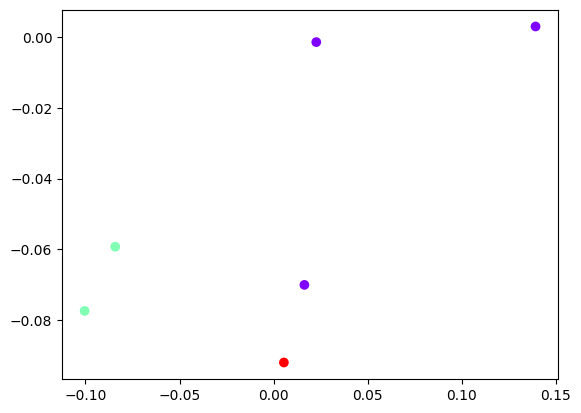

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt


X = np.concatenate((embeddings1.cpu().detach().numpy() , embeddings2.cpu().detach().numpy()))

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

print(kmeans.cluster_centers_)

print(kmeans.labels_)

plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

data = X
labels = kmeans.labels_